## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import scipy.stats as st
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import FunctionTransformer
from mlxtend.feature_selection import SequentialFeatureSelector

## Loading Dataset

In [2]:
dd = pd.read_csv(r"C:\Users\hi\Desktop\Innomatics\ML Sample Docs\Brain-tumor-detection.csv")

In [3]:
dd.drop('Unnamed: 0', axis =1 , inplace=True)

In [4]:
dd

Area    Perimeter  Convex Area  Solidity  Equivalent Diameter  \
0     6314.5   521.972649       9855.5  0.640708            89.665328   
1    52776.5  1189.820409      59947.0  0.880386           259.224086   
2    50232.5  1415.349410      69628.5  0.721436           252.899200   
3     4486.0   275.622365       4741.5  0.946114            75.576138   
4      145.0    92.083260        323.5  0.448223            13.587484   
..       ...          ...          ...       ...                  ...   
236    545.5   208.267025       1317.5  0.414042            26.354358   
237    902.0   232.166520       1444.5  0.624438            33.888967   
238   3177.0   217.681239       3260.0  0.974540            63.600959   
239   6103.0  1208.631593      51259.5  0.119061            88.150899   
240    250.0    66.769552        264.0  0.946970            17.841241   

     Major Axis  Minor Axis                                   Eccentricity  \
0     86.297539  146.952896    (8.439724311699382e-17+1.3783115780934465j)   
1    209.590240  405.861420    (1.015395044877726e-16+1.6582659515946696j)   
2    223.632736  373.077637    (8.176507178841775e-17+1.3353249581078526j)   
3     64.818382   93.083397    (6.311037889163952e-17+1.0306707033502136j)   
4     16.900970   28.915043     (8.50007943665633e-17+1.3881683180120858j)   
..          ...         ...                                            ...   
236   28.902472   64.973869   (1.2328363649866522e-16+2.0133745759920343j)   
237   30.549131   62.921772     (1.1025778731209189e-16+1.80064631514748j)   
238   63.508198   66.241142   (1.815595306633918e-17+0.29650921521176654j)   
239  280.000031  285.934113  (1.2673089388466744e-17+0.20696725614749073j)   
240   12.933073   26.319555   (1.0852923199683768e-16+1.7724168645588256j)   

     Class  
0        1  
1        1  
2        1  
3        1  
4        1  
..     ...  
236      0  
237      0  
238      0  
239      0  
240      0  

[241 rows x 9 columns]

## EDA

In [5]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 241 non-null    float64
 1   Perimeter            241 non-null    float64
 2   Convex Area          241 non-null    float64
 3   Solidity             241 non-null    float64
 4   Equivalent Diameter  241 non-null    float64
 5   Major Axis           241 non-null    float64
 6   Minor Axis           241 non-null    float64
 7   Eccentricity         241 non-null    object 
 8   Class                241 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 17.1+ KB


In [6]:
dd.isna().sum()

Area                   0
Perimeter              0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
Eccentricity           0
Class                  0
dtype: int64

In [7]:
len(dd[dd.duplicated()])

51

In [8]:
dd.drop_duplicates(inplace=True)            ## Dropping Duplicates

In [9]:
dd['Eccentricity'] = dd['Eccentricity'].astype('complex')  ## Typecasting as the data is complex number but is found as Object.

In [10]:
dd['Eccentricity'] = dd['Eccentricity'].apply(lambda x: abs(x))  ## converting Complex number to continuous number

In [11]:
for i in dd.columns:                  ## Checking variance
    print(f"{i} : {dd[i].var()}")

Area : 8114449749.416635
Perimeter : 516030.88074111426
Convex Area : 10039992968.303225
Solidity : 0.09321264977604578
Equivalent Diameter : 14237.63099628138
Major Axis : 47626.73711460937
Minor Axis : 1024955.4129949147
Eccentricity : 6.169704065296191
Class : 0.22099693678641044


Area                       Axes(0.125,0.77;0.227941x0.11)
Perimeter               Axes(0.398529,0.77;0.227941x0.11)
Convex Area             Axes(0.672059,0.77;0.227941x0.11)
Solidity                  Axes(0.125,0.638;0.227941x0.11)
Equivalent Diameter    Axes(0.398529,0.638;0.227941x0.11)
Major Axis             Axes(0.672059,0.638;0.227941x0.11)
Minor Axis                Axes(0.125,0.506;0.227941x0.11)
Eccentricity           Axes(0.398529,0.506;0.227941x0.11)
Class                  Axes(0.672059,0.506;0.227941x0.11)
dtype: object

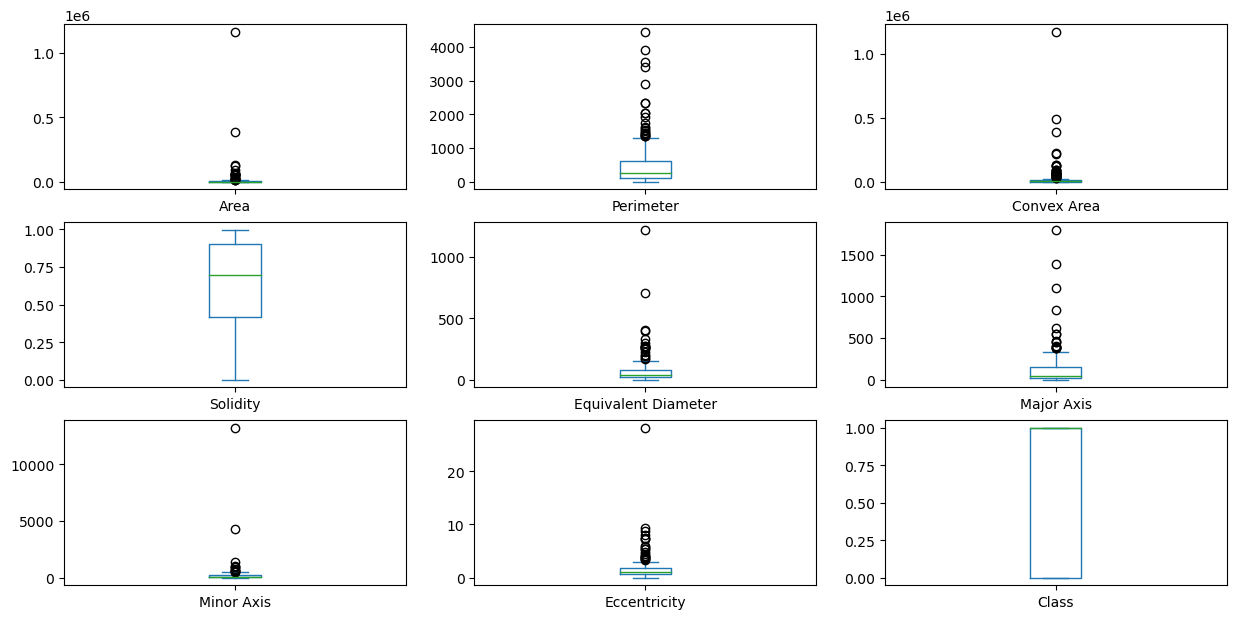

In [12]:
dd.plot(kind='box', subplots=True, layout=(6,3), figsize=(15, 15))

<Axes: ylabel='Density'>

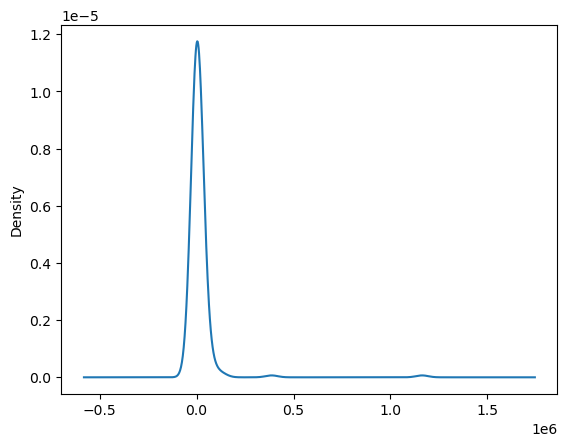

In [13]:
dd['Area'].plot(kind = 'kde')

<Axes: ylabel='Density'>

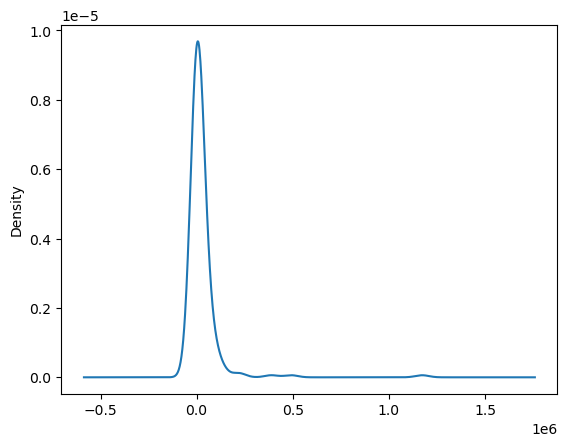

In [14]:
dd['Convex Area'].plot(kind = 'kde')

<Axes: ylabel='Density'>

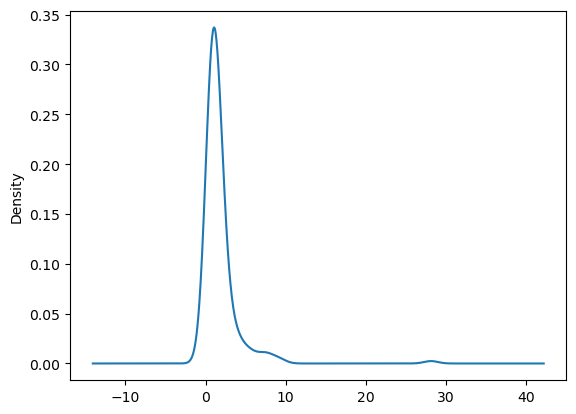

In [15]:
dd['Eccentricity'].plot(kind = 'kde')

<Axes: ylabel='Density'>

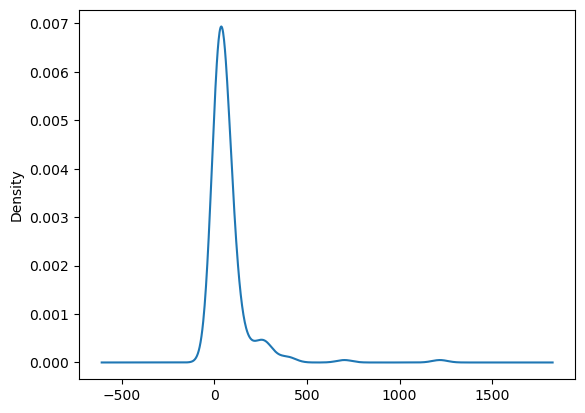

In [16]:
dd['Equivalent Diameter'].plot(kind = 'kde')

<Axes: ylabel='Density'>

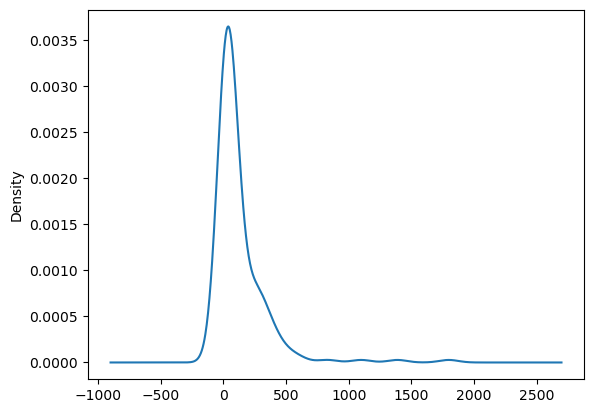

In [17]:
dd['Major Axis'].plot(kind = 'kde')

<Axes: ylabel='Density'>

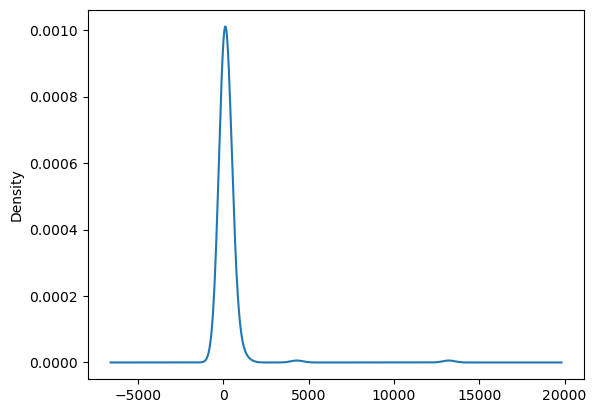

In [18]:
dd['Minor Axis'].plot(kind = 'kde')

<Axes: ylabel='Density'>

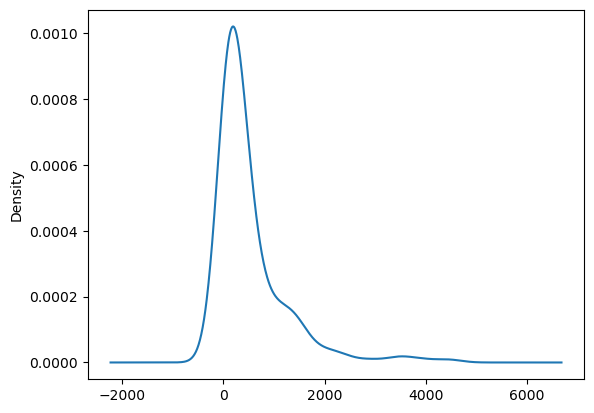

In [19]:
dd['Perimeter'].plot(kind = 'kde')

<Axes: ylabel='Density'>

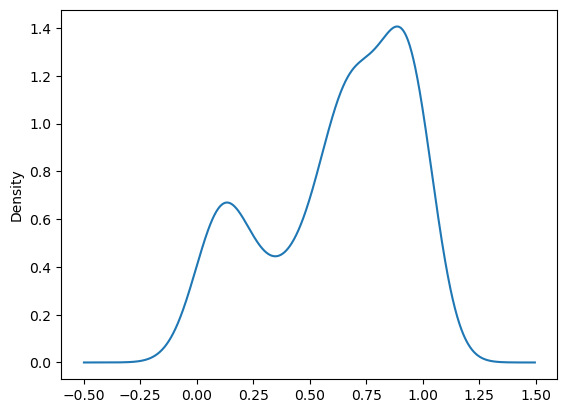

In [20]:
dd['Solidity'].plot(kind = 'kde')

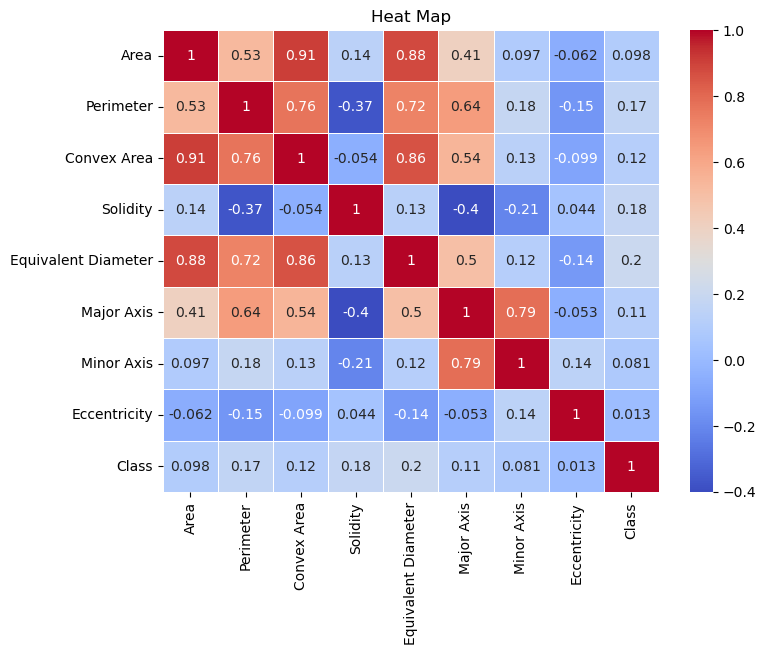

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(dd.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heat Map')
plt.show()

## Splitting the data

In [22]:
x = dd.drop('Class', axis = 1)
y = dd['Class']

In [23]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.23, random_state=20)

## Transformation

#### X_Train

In [24]:
def sqrt(n):
    return np.sqrt(n)

fun = FunctionTransformer(func = sqrt)

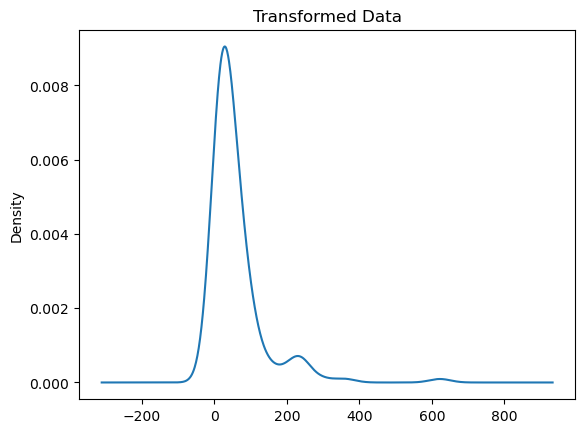

In [25]:
fun.fit(x_train['Area'])
x_train['Area'] = fun.transform(x_train['Area'])

plt.title("Transformed Data")
x_train['Area'].plot(kind = 'kde')
plt.show()

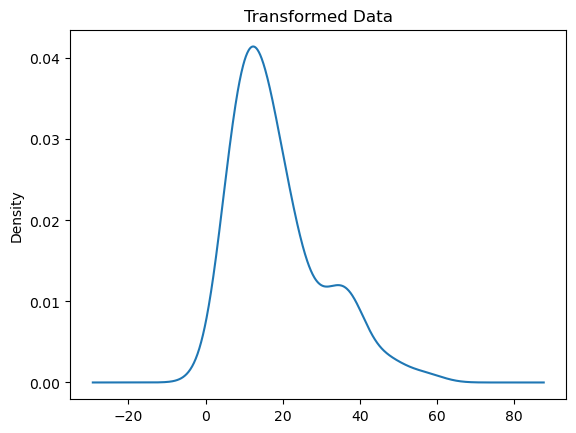

In [26]:
fun.fit(x_train['Perimeter'])
x_train['Perimeter'] = fun.transform(x_train['Perimeter'])

plt.title("Transformed Data")
x_train['Perimeter'].plot(kind = 'kde')
plt.show()

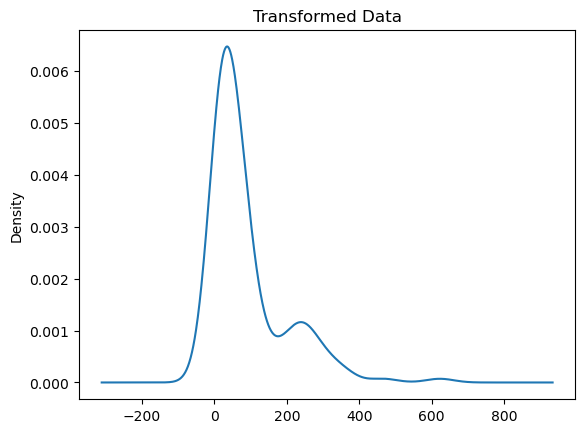

In [27]:
fun.fit(x_train['Convex Area'])
x_train['Convex Area'] = fun.transform(x_train['Convex Area'])

plt.title("Transformed Data")
x_train['Convex Area'].plot(kind = 'kde')
plt.show()

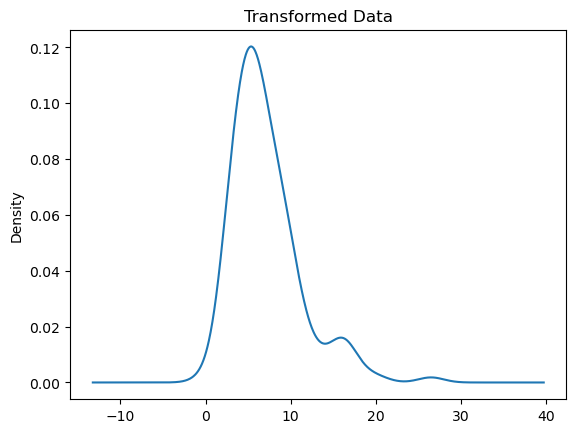

In [28]:
fun.fit(x_train['Equivalent Diameter'])
x_train['Equivalent Diameter'] = fun.transform(x_train['Equivalent Diameter'])

plt.title("Transformed Data")
x_train['Equivalent Diameter'].plot(kind = 'kde')
plt.show()

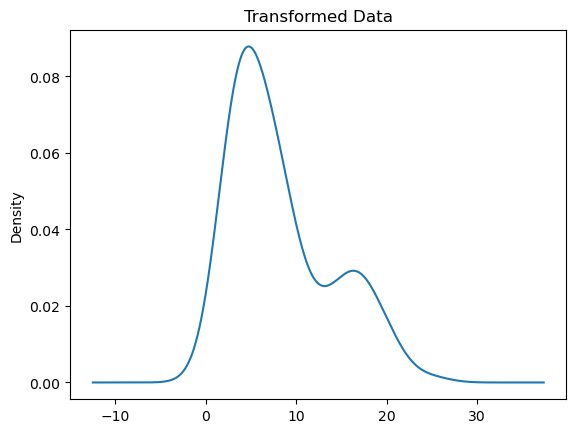

In [29]:
fun.fit(x_train['Major Axis'])
x_train['Major Axis'] = fun.transform(x_train['Major Axis'])

plt.title("Transformed Data")
x_train['Major Axis'].plot(kind = 'kde')
plt.show()

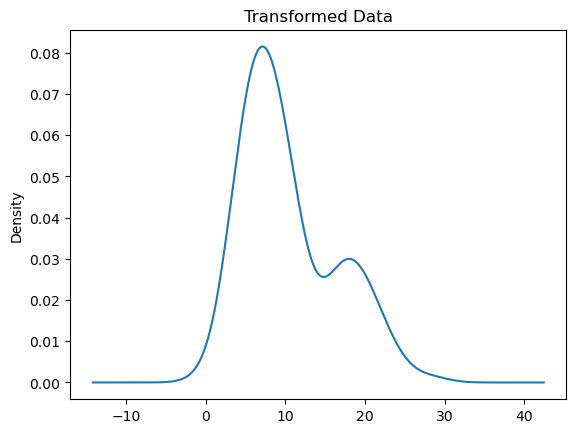

In [30]:
fun.fit(x_train['Minor Axis'])
x_train['Minor Axis'] = fun.transform(x_train['Minor Axis'])

plt.title("Transformed Data")
x_train['Minor Axis'].plot(kind = 'kde')
plt.show()

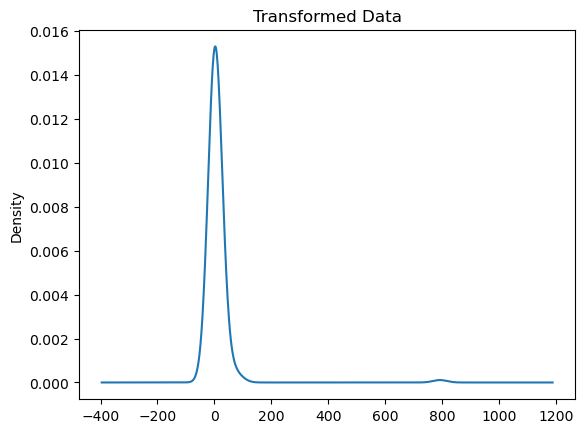

In [31]:
x_train['Eccentricity'] = np.square(x_train['Eccentricity'])

plt.title("Transformed Data")
x_train['Eccentricity'].plot(kind = 'kde')
plt.show()

#### X_Test

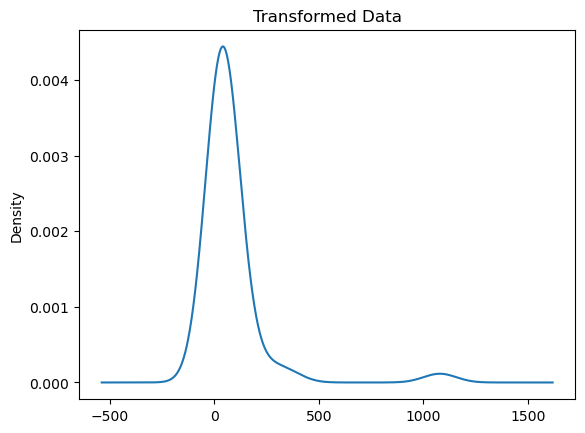

In [32]:
x_test['Area'] = fun.transform(x_test['Area'])

plt.title("Transformed Data")
x_test['Area'].plot(kind = 'kde')
plt.show()

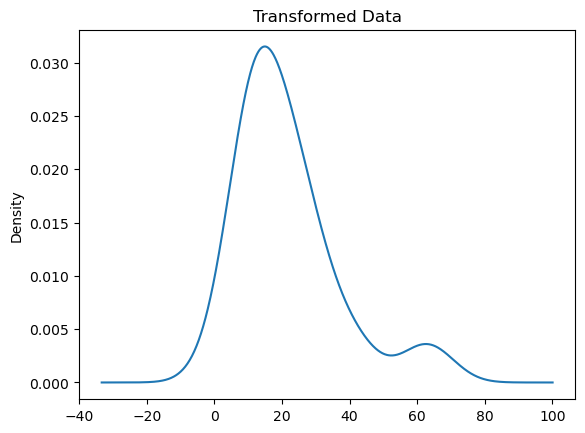

In [33]:
x_test['Perimeter'] = fun.transform(x_test['Perimeter'])

plt.title("Transformed Data")
x_test['Perimeter'].plot(kind = 'kde')
plt.show()

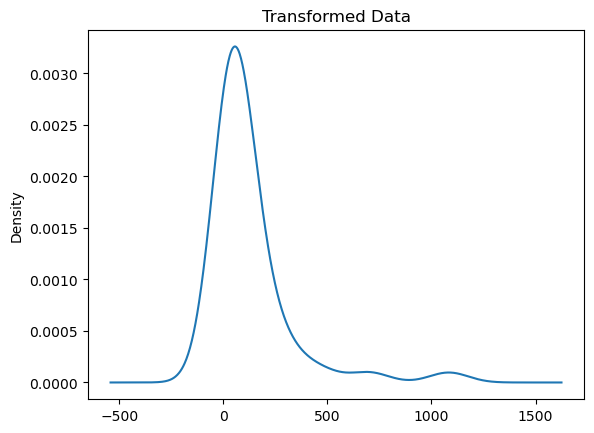

In [34]:
x_test['Convex Area'] = fun.transform(x_test['Convex Area'])

plt.title("Transformed Data")
x_test['Convex Area'].plot(kind = 'kde')
plt.show()

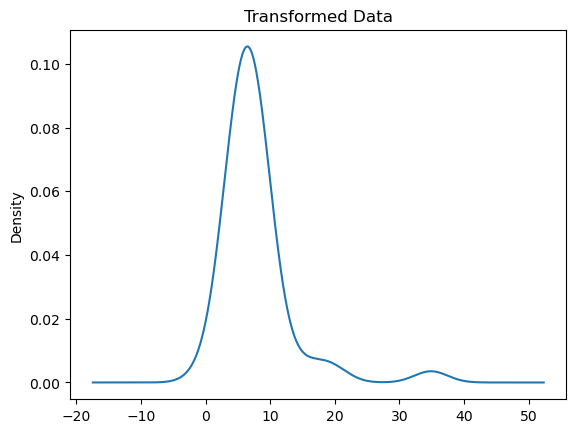

In [35]:
x_test['Equivalent Diameter'] = fun.transform(x_test['Equivalent Diameter'])

plt.title("Transformed Data")
x_test['Equivalent Diameter'].plot(kind = 'kde')
plt.show()

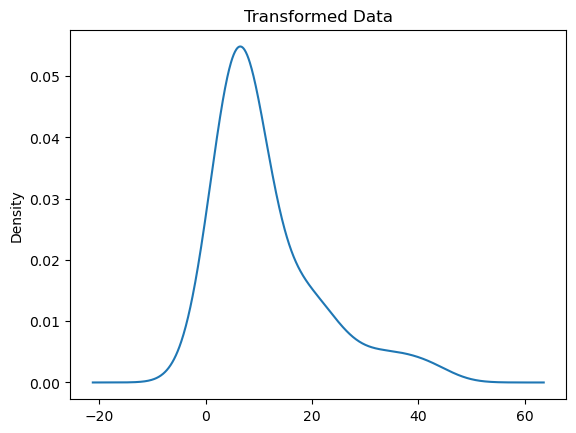

In [36]:
x_test['Major Axis'] = fun.transform(x_test['Major Axis'])

plt.title("Transformed Data")
x_test['Major Axis'].plot(kind = 'kde')
plt.show()

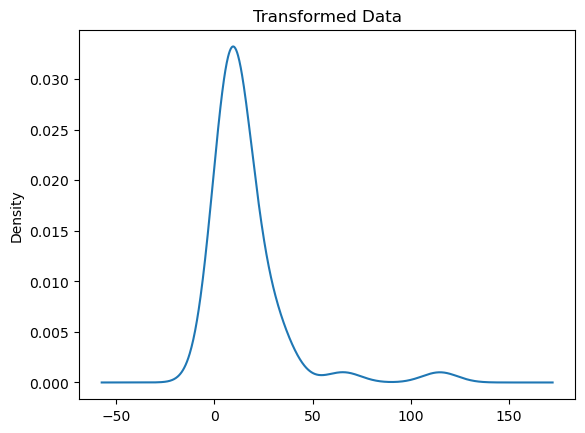

In [37]:
x_test['Minor Axis'] = fun.transform(x_test['Minor Axis'])

plt.title("Transformed Data")
x_test['Minor Axis'].plot(kind = 'kde')
plt.show()

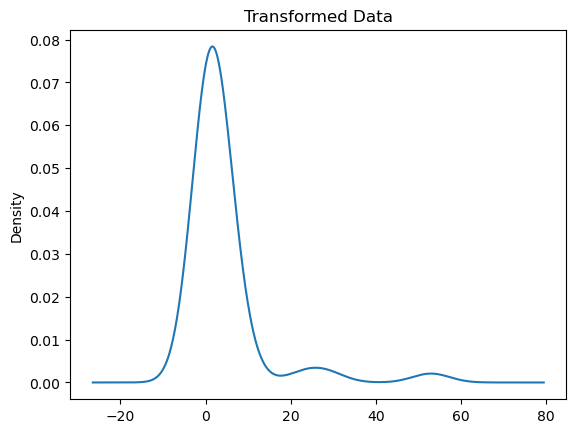

In [38]:
x_test['Eccentricity'] = np.square(x_test['Eccentricity'])

plt.title("Transformed Data")
x_test['Eccentricity'].plot(kind = 'kde')
plt.show()

## Outlier Treatment

In [39]:
for i in x_train[['Area', 'Perimeter', 'Solidity', 'Equivalent Diameter', 'Major Axis','Minor Axis', 'Eccentricity']]:
    iqr_winsor=Winsorizer(capping_method="mad",tail="both",fold=1)
    iqr_winsor.fit(x_train[[i]])
    x_train[i]=iqr_winsor.transform(x_train[[i]])

Area                       Axes(0.125,0.77;0.227941x0.11)
Perimeter               Axes(0.398529,0.77;0.227941x0.11)
Convex Area             Axes(0.672059,0.77;0.227941x0.11)
Solidity                  Axes(0.125,0.638;0.227941x0.11)
Equivalent Diameter    Axes(0.398529,0.638;0.227941x0.11)
Major Axis             Axes(0.672059,0.638;0.227941x0.11)
Minor Axis                Axes(0.125,0.506;0.227941x0.11)
Eccentricity           Axes(0.398529,0.506;0.227941x0.11)
dtype: object

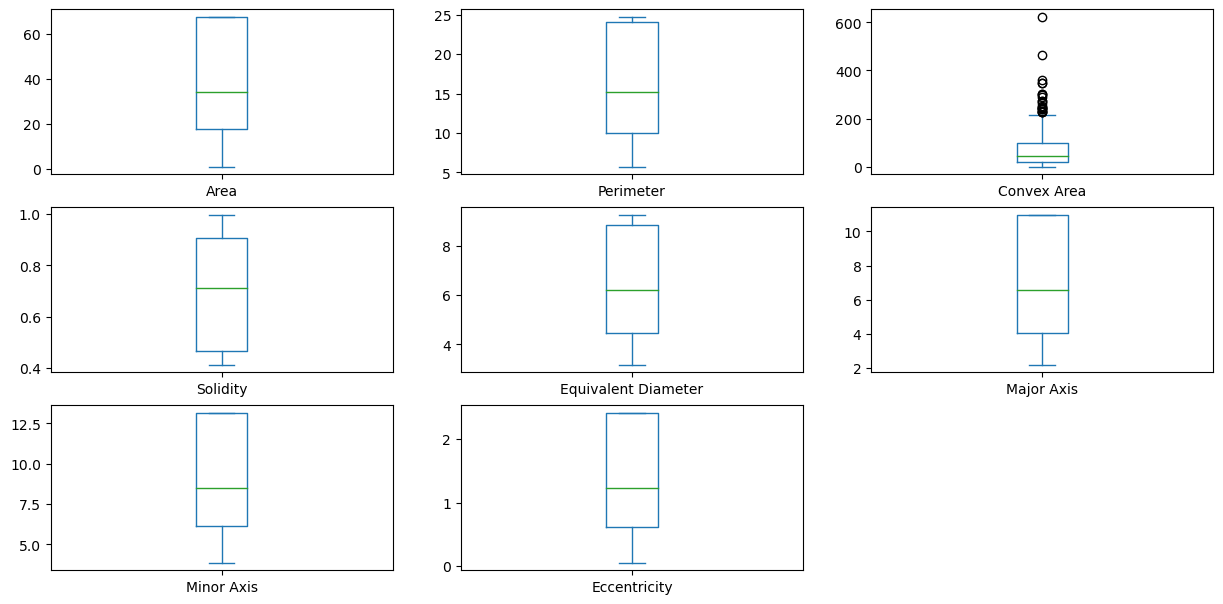

In [40]:
x_train.plot(kind='box', subplots=True, layout=(6,3), figsize=(15, 15))

In [41]:
for i in x_test[['Area', 'Perimeter', 'Solidity', 'Equivalent Diameter', 'Major Axis','Minor Axis', 'Eccentricity']]:
    iqr_winsor=Winsorizer(capping_method="mad",tail="both",fold=1)
    iqr_winsor.fit(x_test[[i]])
    x_test[i]=iqr_winsor.transform(x_test[[i]])

Area                       Axes(0.125,0.77;0.227941x0.11)
Perimeter               Axes(0.398529,0.77;0.227941x0.11)
Convex Area             Axes(0.672059,0.77;0.227941x0.11)
Solidity                  Axes(0.125,0.638;0.227941x0.11)
Equivalent Diameter    Axes(0.398529,0.638;0.227941x0.11)
Major Axis             Axes(0.672059,0.638;0.227941x0.11)
Minor Axis                Axes(0.125,0.506;0.227941x0.11)
Eccentricity           Axes(0.398529,0.506;0.227941x0.11)
dtype: object

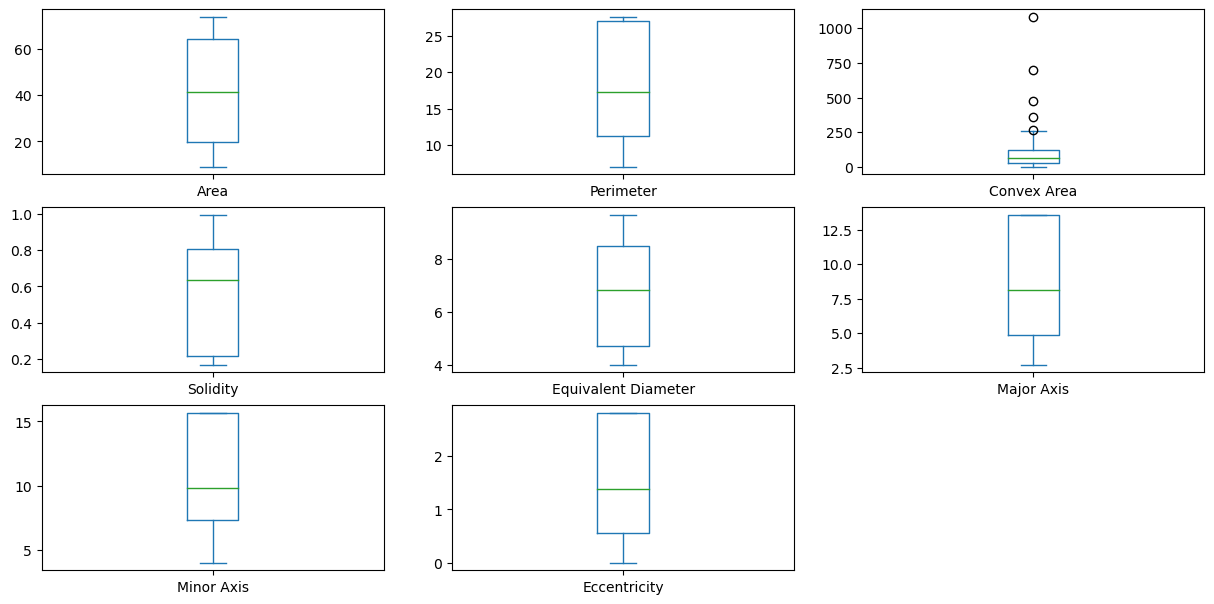

In [42]:
x_test.plot(kind='box', subplots=True, layout=(6,3), figsize=(15, 15))

## Scaling

In [43]:
for i in x_train:
    print(i)

Area
Perimeter
Convex Area
Solidity
Equivalent Diameter
Major Axis
Minor Axis
Eccentricity


In [44]:
for i in x_train[['Area', 'Perimeter', 'Solidity', 'Equivalent Diameter', 'Major Axis','Minor Axis', 'Eccentricity']]:
    scaler = StandardScaler()
    scaler.fit(x_train[[i]])
    x_train[[i]] = scaler.transform(x_train[[i]])
    x_test[[i]] = scaler.transform(x_test[[i]])

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

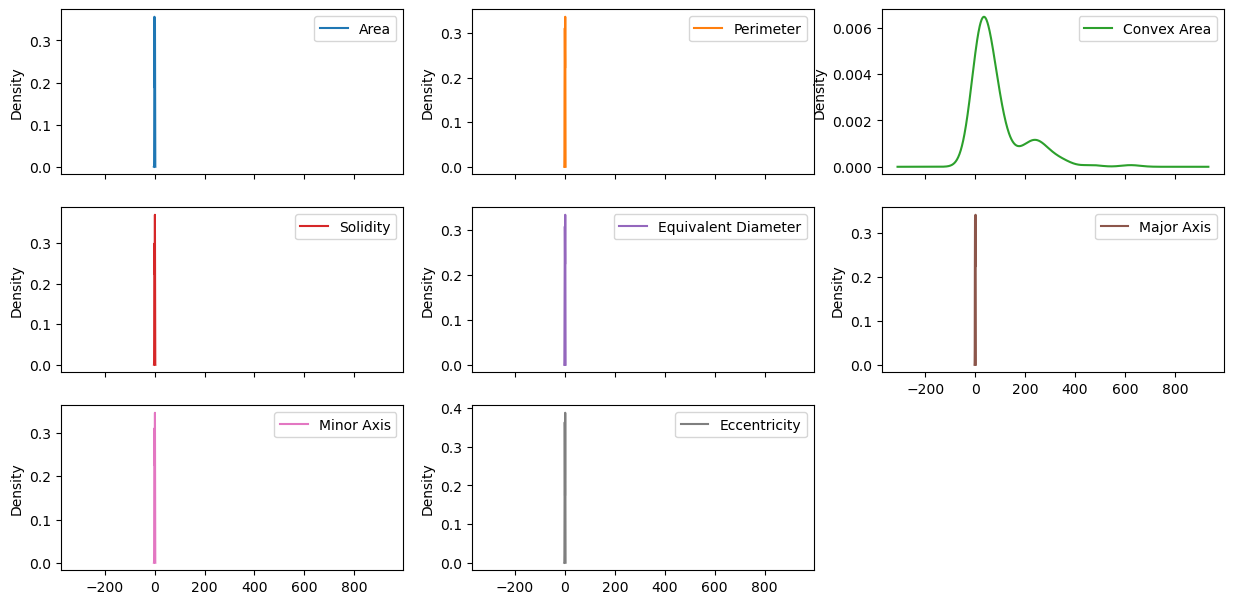

In [45]:
x_train.plot(kind='kde', subplots=True, layout=(6,3), figsize=(15, 15))

## Feature selection

In [46]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [47]:
bseq = SequentialFeatureSelector(gnb, k_features=2, forward=False, floating=True)   ## Backward selection
bimp = bseq.fit_transform(x_train, y_train)

In [48]:
pd.DataFrame(bseq.get_metric_dict()).T

feature_idx  \
8  (0, 1, 2, 3, 4, 5, 6, 7)   
7     (0, 1, 3, 4, 5, 6, 7)   
6        (1, 3, 4, 5, 6, 7)   
5           (1, 3, 5, 6, 7)   
4              (3, 5, 6, 7)   
3                 (3, 5, 7)   
2                    (3, 7)   

                                           cv_scores avg_score  \
8  [0.6666666666666666, 0.7241379310344828, 0.482...  0.622989   
7  [0.7333333333333333, 0.8275862068965517, 0.482...  0.670805   
6  [0.7666666666666667, 0.8620689655172413, 0.517...  0.698161   
5  [0.7666666666666667, 0.8620689655172413, 0.551...  0.718851   
4  [0.8, 0.7931034482758621, 0.5862068965517241, ...  0.732414   
3  [0.7666666666666667, 0.7931034482758621, 0.586...  0.705057   
2  [0.7666666666666667, 0.7241379310344828, 0.724...   0.73954   

                                       feature_names  ci_bound   std_dev  \
8  (Area, Perimeter, Convex Area, Solidity, Equiv...   0.15193  0.118207   
7  (Area, Perimeter, Solidity, Equivalent Diamete...  0.183927  0.143102   
6  (Perimeter, Solidity, Equivalent Diameter, Maj...  0.193882  0.150847   
5  (Perimeter, Solidity, Major Axis, Minor Axis, ...  0.201552  0.156814   
4   (Solidity, Major Axis, Minor Axis, Eccentricity)  0.139524  0.108554   
3               (Solidity, Major Axis, Eccentricity)  0.108545  0.084451   
2                           (Solidity, Eccentricity)  0.024465  0.019035   

    std_err  
8  0.059103  
7  0.071551  
6  0.075423  
5  0.078407  
4  0.054277  
3  0.042226  
2  0.009517

In [49]:
x_train.drop(['Convex Area', 'Solidity'], axis = 1, inplace=True)

In [50]:
x_test.drop(['Convex Area', "Solidity"], axis = 1, inplace=True)

## Model building

In [51]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

#### Test Evaluation

In [52]:
y_pred = gnb.predict(x_test)

In [53]:
accuracy_score(y_pred, y_test)   ## Accuracy

0.6363636363636364

In [54]:
f1_score(y_test, y_pred)   ## F1 Score

0.7037037037037037

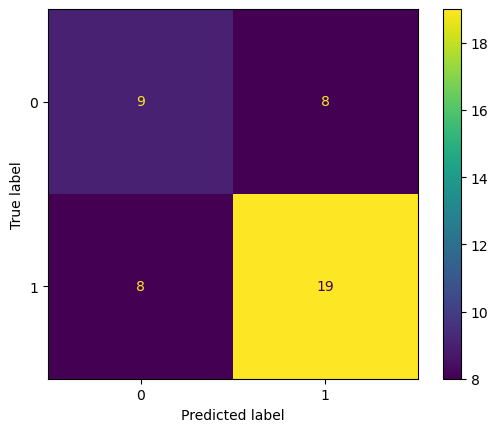

In [55]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()  ## Confusion Matrix

#### Train Evaluation

In [56]:
y_train_pred = gnb.predict(x_train)
accuracy_score(y_train_pred, y_train)

0.6438356164383562

In [57]:
f1_score(y_train_pred, y_train)

0.7173913043478262

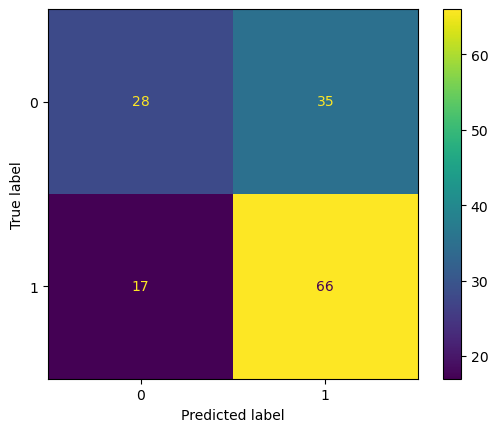

In [58]:
ConfusionMatrixDisplay(confusion_matrix(y_train_pred, y_train)).plot()

## Creating the Pickle File

In [59]:
import pickle

pickle.dump(gnb,open("Brain_Tumor_Gaussian_Naive.pkl","wb"))


In [60]:
predict=pickle.load(open("Brain_Tumor_Gaussian_Naive.pkl","rb"))

In [61]:
predict.predict([[-1.143610,-0.950769,-1.235599,-1.357544,-0.781416,1.211301]])

C:\Users\hi\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [62]:
x_train

Area  Perimeter  Equivalent Diameter  Major Axis  Minor Axis  \
64  -0.028417   0.348859             0.053322   -0.660710    0.782367   
1    1.297024   1.299006             1.308613    1.285836    1.270404   
125  0.722640  -0.189136             0.665657    0.199933   -0.190752   
184  0.114214   1.269256             0.179090    1.285836    1.270404   
68  -0.075618  -0.233626             0.010490   -0.098261   -0.471750   
..        ...        ...                  ...         ...         ...   
183  1.297024   1.299006             1.308613    0.772101    0.651566   
163  0.389108   1.299006             0.407890    0.547469    0.022367   
198 -1.143610  -0.950769            -1.235599   -1.357544   -0.781416   
15   0.351540   0.552344             0.377574    0.375439    0.395992   
113  1.297024   1.299006             1.308613    1.285836    1.270404   

     Eccentricity  
64       1.211301  
1        1.211301  
125     -1.066383  
184     -0.470720  
68      -0.952914  
..            ...  
183     -0.467946  
163     -1.414655  
198      1.211301  
15       0.237801  
113     -1.032189  

[146 rows x 6 columns]

In [63]:
y_train

64     1
1      1
125    1
184    0
68     1
      ..
183    0
163    0
198    0
15     1
113    1
Name: Class, Length: 146, dtype: int64